Epoch 1/100
45/45 [==============================] - 7s 48ms/step - loss: 2.3842
Epoch 2/100
45/45 [==============================] - 2s 44ms/step - loss: 1.0594
Epoch 3/100
45/45 [==============================] - 2s 45ms/step - loss: 1.0549
Epoch 4/100
45/45 [==============================] - 2s 44ms/step - loss: 0.9068
Epoch 5/100
45/45 [==============================] - 2s 43ms/step - loss: 0.8612
Epoch 6/100
45/45 [==============================] - 2s 49ms/step - loss: 0.8222
Epoch 7/100
45/45 [==============================] - 2s 45ms/step - loss: 0.7930
Epoch 8/100
45/45 [==============================] - 2s 43ms/step - loss: 0.7350
Epoch 9/100
45/45 [==============================] - 2s 43ms/step - loss: 0.8207
Epoch 10/100
45/45 [==============================] - 2s 42ms/step - loss: 0.8097
Epoch 11/100
45/45 [==============================] - 2s 42ms/step - loss: 0.8893
Epoch 12/100
45/45 [==============================] - 2s 42ms/step - loss: 0.7428
Epoch 13/100
45/45 [=====

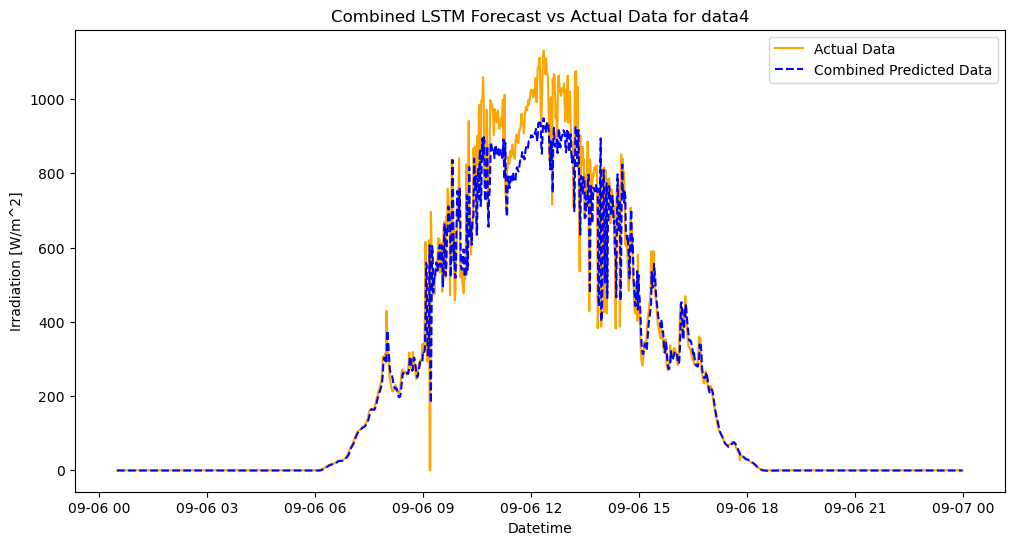

In [103]:
# The multiple model 230924 has been updated to incorporate the actual data from the farm. 
# 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


# Function to create LSTM dataset
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Function to build and compile an LSTM model
def build_lstm_model(time_step):
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=(time_step, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(100))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
# Step 2: Prepare the data
# Now we will preprocess the four datasets and normalize them using MinMaxScaler.

# Load datasets
# data1 = pd.read_csv('texas_110924.csv')
# data2 = pd.read_csv('texas_120924.csv')
# data3 = pd.read_csv('texas_300824.csv')
# data4 = pd.read_csv('texas_80924.csv')
# Load datasets: BCP
data1 = pd.read_csv('BPI 2024-09-01.csv')
data2 = pd.read_csv('BPI 2024-09-02.csv')
data3 = pd.read_csv('BPI 2024-09-03.csv')
# data3 = pd.read_csv('BPI 2024-09-05.csv')
# data3 = pd.read_csv('BPI 2024-09-14.csv')
data4 = pd.read_csv('BPI 2024-09-04.csv')
data5 = pd.read_csv('BPI 2024-09-06.csv')



# Data preparation function to preprocess data (same steps for all datasets)
# def preprocess_data(df):
#     df['DATE'] = pd.to_datetime(df['DATE (MM/DD/YYYY)'], format='%m/%d/%Y')
#     df['CST'] = pd.to_datetime(df['CST'], format='%H:%M').dt.time
#     df['Datetime'] = df.apply(lambda row: pd.Timestamp.combine(row['DATE'], row['CST']), axis=1)
#     df.set_index('Datetime', inplace=True)
#     df = df[['Global Horizontal [W/m^2]']].dropna()
#     return df

# Data preparation function to preprocess data (same steps for all datasets)
def preprocess_data_BCP(df):
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
    df['Datetime'] = df.apply(lambda row: pd.Timestamp.combine(row['Date'], row['Time']), axis=1)
    df.set_index('Datetime', inplace=True)
    df = df[['Irradiation']].dropna()
    return df
    
# Preprocess all datasets
# df1 = preprocess_data(data1)
# df2 = preprocess_data(data2)
# df3 = preprocess_data(data3)
# df4 = preprocess_data(data4)

df1 = preprocess_data_BCP(data1)
df2 = preprocess_data_BCP(data2)
df3 = preprocess_data_BCP(data3)
df4 = preprocess_data_BCP(data4)
df5 = preprocess_data_BCP(data5)
# Normalize the data using MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 5))  # Use (0,2) for spike curves

# scaler = MinMaxScaler(feature_range=(0, 2))  # Use (0,2) for flat curves
# scaler = MinMaxScaler(feature_range=(0, 1))  # Use (0,2) for flat curves
# scaler = MinMaxScaler(feature_range=(0, 0.1))  # Use (0,2) for flat curves
scaler = MinMaxScaler(feature_range=(0, 10))  # Use (0,10) for flat curves

scaled_data1 = scaler.fit_transform(df1.values)
scaled_data2 = scaler.fit_transform(df2.values)
scaled_data3 = scaler.fit_transform(df3.values)
scaled_data4 = scaler.fit_transform(df4.values)
scaled_data5 = scaler.transform(df5.values)  # We only transform data5 since we already fitted the scaler

# Step 3: Create and train models on each dataset
# For each dataset (data1, data2, and data3), we will create an LSTM model, train it, and store the trained models.

time_step = 30  # or another suitable value
models = []

# Train model on data1
X1, y1 = create_dataset(scaled_data1, time_step)
X1 = X1.reshape(X1.shape[0], X1.shape[1], 1)
model1 = build_lstm_model(time_step)
history1 = model1.fit(X1, y1, epochs=100, batch_size=32, verbose=1, callbacks=[EarlyStopping(monitor='loss', patience=10)])
models.append(model1)

# Train model on data2
X2, y2 = create_dataset(scaled_data2, time_step)
X2 = X2.reshape(X2.shape[0], X2.shape[1], 1)
model2 = build_lstm_model(time_step)
history2 = model2.fit(X2, y2, epochs=100, batch_size=32, verbose=1, callbacks=[EarlyStopping(monitor='loss', patience=10)])
models.append(model2)

# Train model on data3
X3, y3 = create_dataset(scaled_data3, time_step)
X3 = X3.reshape(X3.shape[0], X3.shape[1], 1)
model3 = build_lstm_model(time_step)
history3 = model3.fit(X3, y3, epochs=100, batch_size=32, verbose=1, callbacks=[EarlyStopping(monitor='loss', patience=10)])
models.append(model3)

# Train model on data3
X4, y4 = create_dataset(scaled_data4, time_step)
X4 = X4.reshape(X4.shape[0], X4.shape[1], 1)
model4 = build_lstm_model(time_step)
history4 = model4.fit(X4, y4, epochs=100, batch_size=32, verbose=1, callbacks=[EarlyStopping(monitor='loss', patience=10)])
models.append(model4)


# Step 4: Forecast for data4 using each model and combine predictions
# After training the models, we will use each model to predict the values for data4. Finally, we will combine the predictions from all models (e.g., using averaging).

# # Prepare dataset for forecasting (data4)
# X4, y4 = create_dataset(scaled_data4, time_step)
# Prepare dataset for forecasting (data4)


X5, y5 = create_dataset(scaled_data5, time_step)

# X4 = X4.reshape(X4.shape[0], X4.shape[1], 1)
X5 = X5.reshape(X5.shape[0], X5.shape[1], 1)

# Predict the test set results for data4 using each model
predictions = []

for model in models:
    # pred = model.predict(X4)
    pred = model.predict(X5)
    predictions.append(pred)

# Combine predictions from all models (e.g., using averaging)
predictions = np.array(predictions)  # Shape: (n_models, n_samples, 1)
combined_predictions = np.mean(predictions, axis=0)  # Averaging the predictions across models

# Rescale the predictions back to the original scale
combined_predictions_rescaled = scaler.inverse_transform(combined_predictions)
# y4_rescaled = scaler.inverse_transform(y4.reshape(-1, 1))
y5_rescaled = scaler.inverse_transform(y5.reshape(-1, 1))

# Step 5: Calculate error metrics (MAPE and MSE)
# Assume y5_rescaled contains the actual values and combined_predictions_rescaled contains the predicted values.
# Set a threshold to filter out zero or near-zero values.
threshold = 20  # You can adjust this threshold based on your data.

# Filter out zero or near-zero values.
non_zero_indices = np.where(y5_rescaled > threshold)

# Use the filtered indices to compute MSE and MAPE only for non-zero values.
y5_non_zero = y5_rescaled[non_zero_indices]
predictions_non_zero = combined_predictions_rescaled[non_zero_indices]

# Compute MSE only for non-zero values
mse = mean_squared_error(y5_non_zero, predictions_non_zero)

# Compute MAPE only for non-zero values
mape = np.mean(np.abs((y5_non_zero - predictions_non_zero) / y5_non_zero)) * 100

print(f"MSE: {mse}")
print(f"MAPE: {mape}%")

# print(f'MAPE: {mape * 100:.2f}%')
# print(f'MSE: {mse:.4f}')

# Plot the actual vs predicted values
# plt.figure(figsize=(12, 6))
# plt.plot(df4.index[time_step:], y4_rescaled, color='orange', label='Actual Data')
# plt.plot(df4.index[time_step:], combined_predictions_rescaled, color='blue', linestyle='--', label='Combined Predicted Data')
# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(df5.index[time_step:], y5_rescaled, color='orange', label='Actual Data')
plt.plot(df5.index[time_step:], combined_predictions_rescaled, color='blue', linestyle='--', label='Combined Predicted Data')

plt.title('Combined LSTM Forecast vs Actual Data for data4')
plt.xlabel('Datetime')
# plt.ylabel('Global Horizontal [W/m^2]')
plt.ylabel('Irradiation [W/m^2]')
plt.legend()
plt.show()


45/45 [==============================] - 2s 39ms/step
1-Minute MAPE: 15.30%


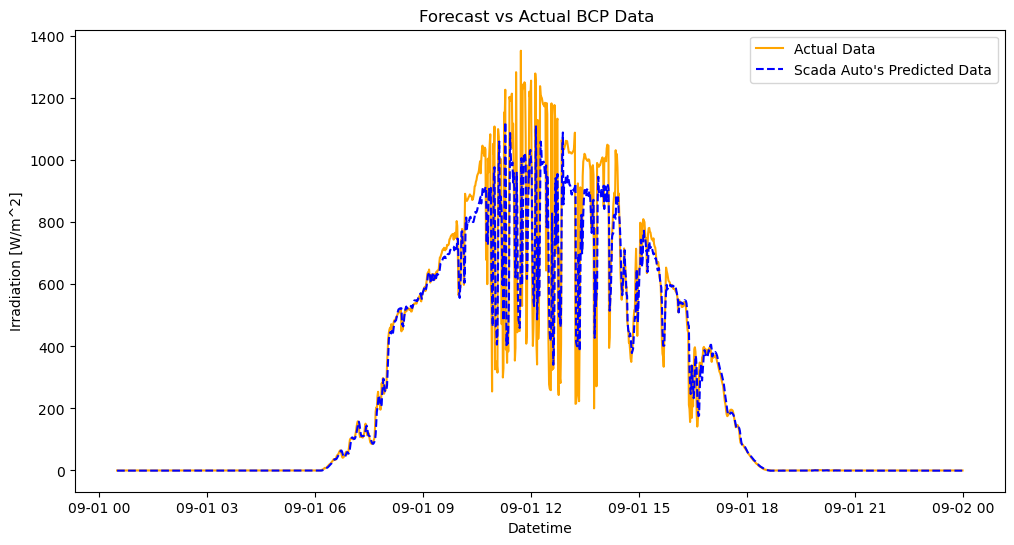

In [215]:
# data4 = pd.read_csv('texas.csv')
# data4 = pd.read_csv('texas_150924.csv')
# data4 = pd.read_csv('texas_110924.csv')
# data4 = pd.read_csv('texas_120924.csv')
# data4 = pd.read_csv('texas_130924.csv')
# data4 = pd.read_csv('texas_70924.csv')
# data4 = pd.read_csv('texas_60924.csv')
# data4 = pd.read_csv('texas_50924.csv')
# data4 = pd.read_csv('texas_40924.csv')
# data4 = pd.read_csv('texas_30924.csv')
# data4 = pd.read_csv('texas_20924.csv')
# data4 = pd.read_csv('texas_10924.csv')
# data4 = pd.read_csv('texas_310824.csv')
data5 = pd.read_csv('BPI 2024-09-01.csv')
# data5 = pd.read_csv('BPI 2024-09-02.csv')
# data5 = pd.read_csv('BPI 2024-09-03.csv')
# data5 = pd.read_csv('BPI 2024-09-04.csv')
# data5 = pd.read_csv('BPI 2024-09-05.csv')
# data5 = pd.read_csv('BPI 2024-09-06.csv')
# data5 = pd.read_csv('BPI 2024-09-07.csv')
# data5 = pd.read_csv('BPI 2024-09-03.csv')
# data5 = pd.read_csv('BPI 2024-09-08.csv')
# data5 = pd.read_csv('BPI 2024-09-09.csv')
# data5 = pd.read_csv('BPI 2024-09-10.csv')
# data5 = pd.read_csv('BPI 2024-09-11.csv')
# data5 = pd.read_csv('BPI 2024-09-12.csv')
# data5 = pd.read_csv('BPI 2024-09-13.csv')
# data5 = pd.read_csv('BPI 2024-09-14.csv')
# data5 = pd.read_csv('BPI 2024-09-15.csv')
# data5 = pd.read_csv('BPI 2024-09-16.csv')
# data5 = pd.read_csv('BPI 2024-09-17.csv')
# data5 = pd.read_csv('BPI 2024-09-18.csv')
# data5 = pd.read_csv('BPI 2024-09-19.csv')
# data5 = pd.read_csv('BPI 2024-09-20.csv')
# data5 = pd.read_csv('BPI 2024-09-21.csv')
# data5 = pd.read_csv('BPI 2024-09-22.csv')
# data5 = pd.read_csv('BPI 2024-09-23.csv')
# data5 = pd.read_csv('BPI 2024-09-24.csv')

# data5 = pd.read_csv('BPI 2024-09-07.csv')
# data5 = pd.read_csv('BPI 2024-09-05.csv')


df5 = preprocess_data_BCP(data5)
scaled_data5 = scaler.transform(df5.values)  # We only transform data4 since we already fitted the scaler


# Prepare dataset for forecasting (data5)
X5, y5 = create_dataset(scaled_data5, time_step)
X5 = X5.reshape(X5.shape[0], X5.shape[1], 1)

# Predict the test set results for data4 using each model
predictions = []

for model in models:
    # pred = model.predict(X4)
    pred = model.predict(X5)
    predictions.append(pred)

# Combine predictions from all models (e.g., using averaging)
predictions = np.array(predictions)  # Shape: (n_models, n_samples, 1)
combined_predictions = np.mean(predictions, axis=0)  # Averaging the predictions across models

# Rescale the predictions back to the original scale
combined_predictions_rescaled = scaler.inverse_transform(combined_predictions)
y5_rescaled = scaler.inverse_transform(y5.reshape(-1, 1))


# Step 5: Calculate error metrics (MAPE and MSE)
# Assume y5_rescaled contains the actual values and combined_predictions_rescaled contains the predicted values.
# Set a threshold to filter out zero or near-zero values.
threshold = 10  # You can adjust this threshold based on your data.

# Filter out zero or near-zero values.
non_zero_indices = np.where(y5_rescaled > threshold)

# Use the filtered indices to compute MSE and MAPE only for non-zero values.
y5_non_zero = y5_rescaled[non_zero_indices]
predictions_non_zero = combined_predictions_rescaled[non_zero_indices]

# Compute MSE only for non-zero values
mse = mean_squared_error(y5_non_zero, predictions_non_zero)

# Compute MAPE only for non-zero values
mape = np.mean(np.abs((y5_non_zero - predictions_non_zero) / y5_non_zero)) * 100

# Step 5: Calculate error metrics (MAPE and MSE)

# print(f"MSE: {mse}")
# print(f"MAPE: {mape}%")
# print(f'MAPE: {mape:.2f}%')
print(f"1-Minute MAPE: {mape:.2f}%")
# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
# plt.plot(df4.index[time_step:], y4_rescaled, color='orange', label='Actual Data')
# plt.plot(df4.index[time_step:], combined_predictions_rescaled, color='blue', linestyle='--', label='Scada Auto\'s Predicted Data')
plt.plot(df5.index[time_step:], y5_rescaled, color='orange', label='Actual Data')
plt.plot(df5.index[time_step:], combined_predictions_rescaled, color='blue', linestyle='--', label='Scada Auto\'s Predicted Data')
plt.title('Forecast vs Actual BCP Data ')
plt.xlabel('Datetime')
plt.ylabel('Irradiation [W/m^2]')
plt.legend()
plt.show()

15-Minute MAPE: 5.64%


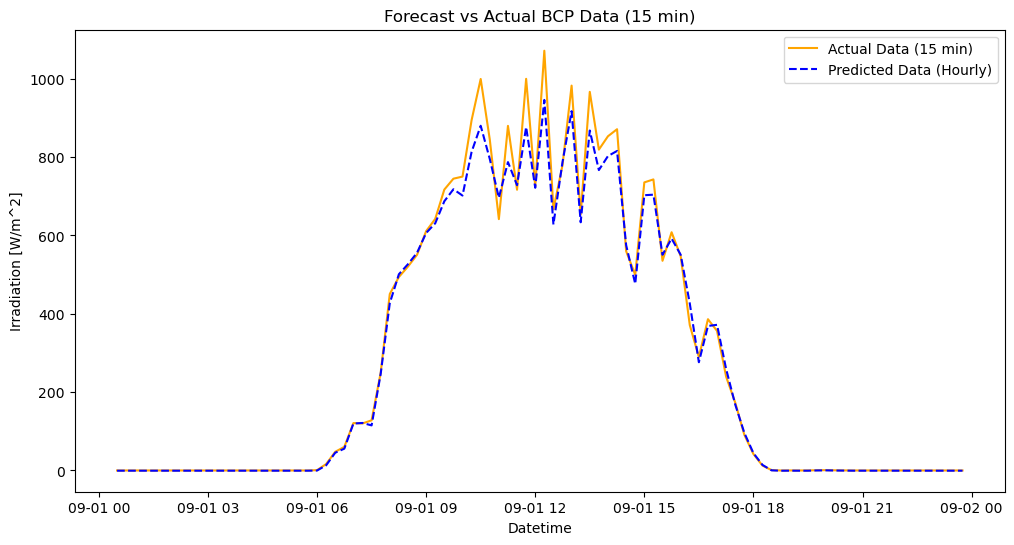

In [185]:
# Ensure that the index is in datetime format
df5.index = pd.to_datetime(df5.index)

# Resample the actual and predicted values to 15-minute frequency by averaging
y5_rescaled_df = pd.DataFrame(y5_rescaled, index=df5.index[time_step:], columns=['Irradiation'])
combined_predictions_rescaled_df = pd.DataFrame(combined_predictions_rescaled, index=df5.index[time_step:], columns=['Predicted'])

# Resample the data to 15-minute averages
y5_rescaled_15min = y5_rescaled_df.resample('15min').mean().values
combined_predictions_rescaled_15min = combined_predictions_rescaled_df.resample('15min').mean().values

# Set a threshold to filter out zero or near-zero values
threshold = 10  # You can adjust this threshold based on your data.

# Filter out zero or near-zero values for 15-minute resampled data
non_zero_indices = np.where(y5_rescaled_15min > threshold)

# Use the filtered indices to compute MSE and MAPE only for non-zero values
y5_non_zero_15min = y5_rescaled_15min[non_zero_indices]
predictions_non_zero_15min = combined_predictions_rescaled_15min[non_zero_indices]

# Compute MSE only for non-zero 15-minute values
mse_15min = mean_squared_error(y5_non_zero_15min, predictions_non_zero_15min)

# Compute MAPE only for non-zero 15-minute values
mape_15min = np.mean(np.abs((y5_non_zero_15min - predictions_non_zero_15min) / y5_non_zero_15min)) * 100

# Print the MAPE and MSE for 15-minute data
# print(f"15-Minute MSE: {mse_15min}")
print(f"15-Minute MAPE: {mape_15min:.2f}%")

# # Plot the actual vs predicted values for hourly data
plt.figure(figsize=(12, 6))
plt.plot(y5_rescaled_df.resample('15min').mean().index, y5_rescaled_15min, color='orange', label='Actual Data (15 min)')
plt.plot(combined_predictions_rescaled_df.resample('15min').mean().index, combined_predictions_rescaled_15min, color='blue', linestyle='--', label='Predicted Data (Hourly)')
plt.title('Forecast vs Actual BCP Data (15 min)')
plt.xlabel('Datetime')
plt.ylabel('Irradiation [W/m^2]')
plt.legend()
plt.show()

Hourly MAPE: 4.41%


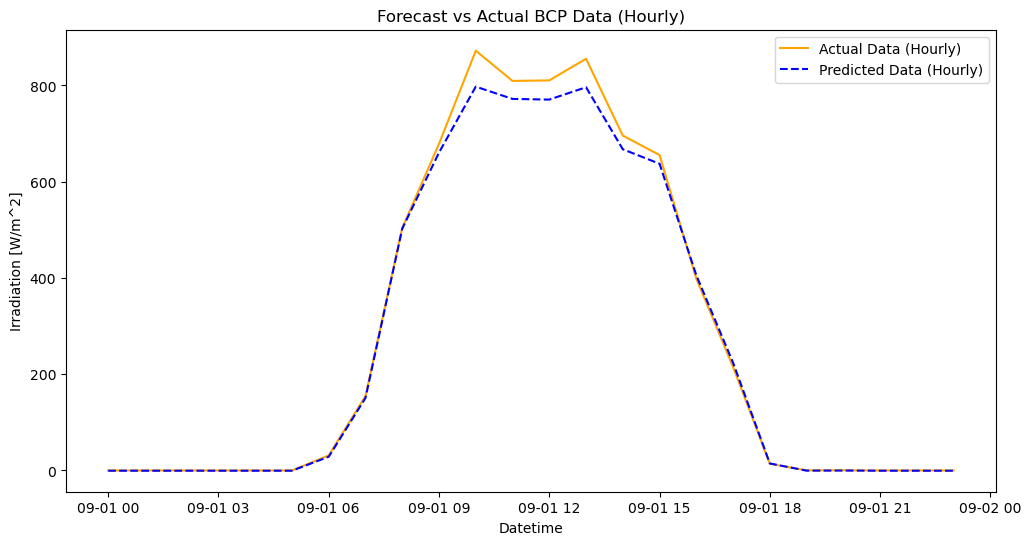

In [181]:
# Assuming df5.index contains the datetime information
# Ensure that the index is in datetime format
# Ensure that the index is in datetime format
df5.index = pd.to_datetime(df5.index)

# Resample the actual and predicted values to hourly frequency by averaging
y5_rescaled_df = pd.DataFrame(y5_rescaled, index=df5.index[time_step:], columns=['Irradiation'])
combined_predictions_rescaled_df = pd.DataFrame(combined_predictions_rescaled, index=df5.index[time_step:], columns=['Predicted'])

# Resample the data to hourly averages
y5_rescaled_hourly = y5_rescaled_df.resample('h').mean().values
combined_predictions_rescaled_hourly = combined_predictions_rescaled_df.resample('h').mean().values

# Set a threshold to filter out zero or near-zero values
threshold = 10  # You can adjust this threshold based on your data.

# Filter out zero or near-zero values for hourly resampled data
non_zero_indices = np.where(y5_rescaled_hourly > threshold)

# Use the filtered indices to compute MSE and MAPE only for non-zero values
y5_non_zero_hourly = y5_rescaled_hourly[non_zero_indices]
predictions_non_zero_hourly = combined_predictions_rescaled_hourly[non_zero_indices]

# Compute MSE only for non-zero hourly values
mse_hourly = mean_squared_error(y5_non_zero_hourly, predictions_non_zero_hourly)

# Compute MAPE only for non-zero hourly values
mape_hourly = np.mean(np.abs((y5_non_zero_hourly - predictions_non_zero_hourly) / y5_non_zero_hourly)) * 100

# Print the MAPE and MSE for hourly data
# print(f"Hourly MSE: {mse_hourly}")
print(f"Hourly MAPE: {mape_hourly:.2f}%")

# # Plot the actual vs predicted values for hourly data
plt.figure(figsize=(12, 6))
plt.plot(y5_rescaled_df.resample('h').mean().index, y5_rescaled_hourly, color='orange', label='Actual Data (Hourly)')
plt.plot(combined_predictions_rescaled_df.resample('h').mean().index, combined_predictions_rescaled_hourly, color='blue', linestyle='--', label='Predicted Data (Hourly)')
plt.title('Forecast vs Actual BCP Data (Hourly)')
plt.xlabel('Datetime')
plt.ylabel('Irradiation [W/m^2]')
plt.legend()
plt.show()

In [175]:
print(f"Hourly MSE: {mse_hourly}")

Hourly MSE: 1051.4924858758054


In [176]:
print(f"15-Minute MSE: {mse_15min}")


15-Minute MSE: 2108.7217293323615


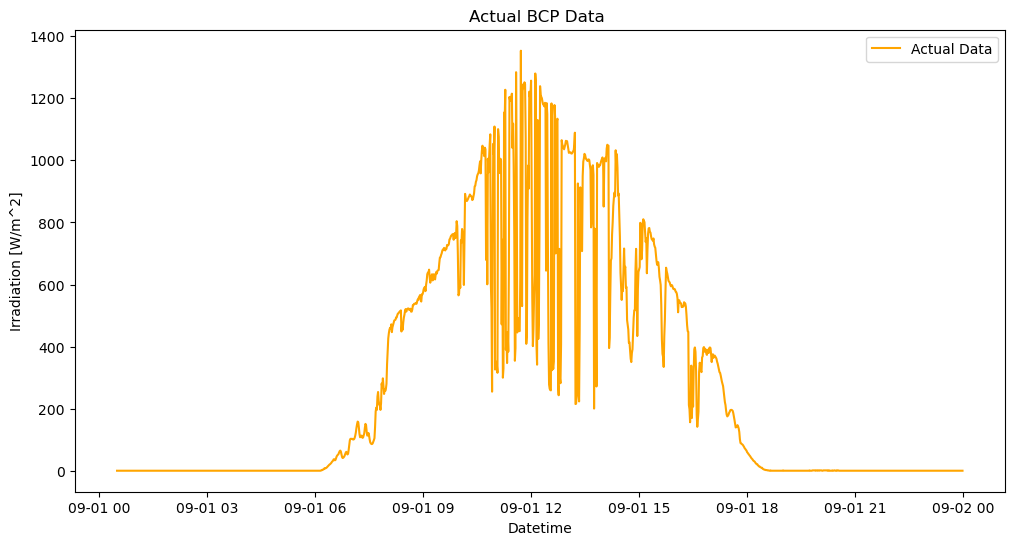

In [177]:
# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
# plt.plot(df4.index[time_step:], y4_rescaled, color='orange', label='Actual Data')
# plt.plot(df4.index[time_step:], combined_predictions_rescaled, color='blue', linestyle='--', label='Scada Auto\'s Predicted Data')
plt.plot(df5.index[time_step:], y5_rescaled, color='orange', label='Actual Data')
# plt.plot(df5.index[time_step:], combined_predictions_rescaled, color='blue', linestyle='--', label='Scada Auto\'s Predicted Data')
plt.title('Actual BCP Data ')
plt.xlabel('Datetime')
plt.ylabel('Irradiation [W/m^2]')
plt.legend()
plt.show()

In [159]:
len(y5_rescaled_hourly)

24

In [160]:
len(y5_rescaled_15min)

94

In [161]:
len(y5_rescaled)

1410

In [162]:
len(data5)

1440

In [163]:
len(y5_rescaled_df)

1410

1/1 [==============================] - 0s 400ms/step


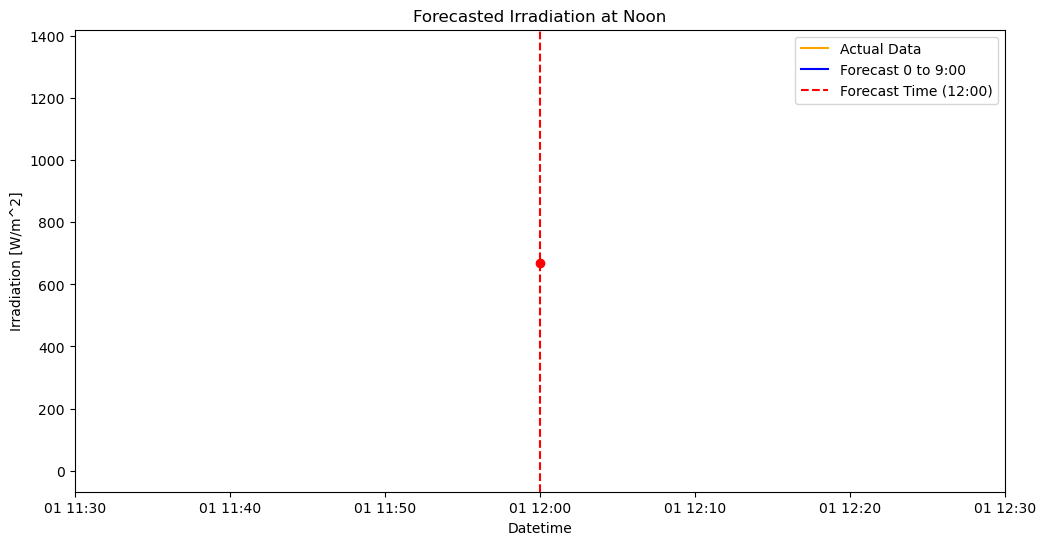

In [212]:


# Ensure that the index is in datetime format
df5.index = pd.to_datetime(df5.index)

# Resample the actual and predicted values to hourly frequency by averaging
y5_rescaled_df = pd.DataFrame(y5_rescaled, index=df5.index[time_step:], columns=['Irradiation'])
combined_predictions_rescaled_df = pd.DataFrame(combined_predictions_rescaled, index=df5.index[time_step:], columns=['Predicted'])

# Filter data to include only entries up to 9:00 AM
df5_noon_forecast = df5[df5.index.time <= pd.to_datetime("09:00").time()]


# Prepare for forecasting at noon
noon_index = pd.date_range(start=df5_noon_forecast.index[-1].date(), 
                            end=df5_noon_forecast.index[-1].date() + pd.DateOffset(hours=12), 
                            freq='h')



# Assuming your model is already trained, predict at noon
predicted_noon = model.predict(df5_noon_forecast.values.reshape(1, -1, 1))  # Adjust based on your model's input requirements
predicted_noon_df = pd.DataFrame(predicted_noon, index=noon_index[-1:], columns=['Predicted'])



# Plot the predictions for visualization
plt.figure(figsize=(12, 6))

# Plot the actual data that corresponds to the available predicted data
plt.plot(df5.index[time_step:], y5_rescaled_df.values, color='orange', label='Actual Data')

# Plot forecasted values from 0 to 9:00 in solid blue
plt.plot(df5.index[:540], combined_predictions_rescaled[:540], color='blue', label='Forecast 0 to 9:00')

# Highlight the predicted value at 12:00 in red
plt.axvline(x=pd.to_datetime("2024-10-01 12:00"), color='red', linestyle='--', label='Forecast Time (12:00)')
plt.scatter(pd.to_datetime("2024-10-01 12:00"), combined_predictions_rescaled[540], color='red', zorder=5)

# Set x-axis limits to zoom in on the time interval from 11:30 to 12:30
plt.xlim(pd.to_datetime("2024-10-01 11:30"), pd.to_datetime("2024-10-01 12:30"))

plt.title('Forecasted Irradiation at Noon')
plt.xlabel('Datetime')
plt.ylabel('Irradiation [W/m^2]')
plt.legend()
plt.show()

Predicted Irradiation at Noon: 10.794472694396973 W/m^2


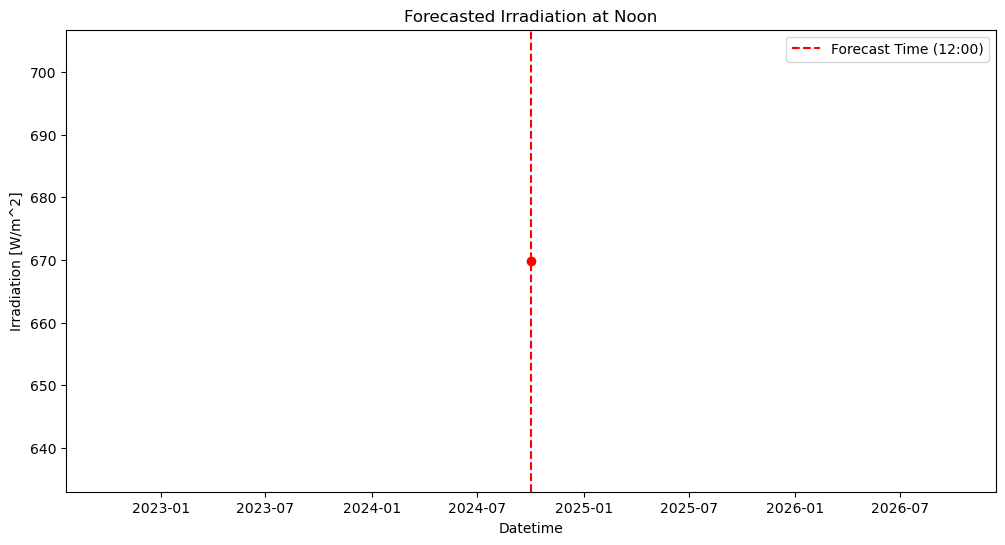

In [207]:
# Print the predicted irradiation at noon
print(f"Predicted Irradiation at Noon: {predicted_noon_df['Predicted'].values[0]} W/m^2")

# Optional: Plot the predictions for visualization
plt.figure(figsize=(12, 6))
# plt.plot(df5.index, y5_rescaled, color='orange', label='Actual Data')
# Only plot the actual data that corresponds to the available predicted data
# plt.plot(df5.index[time_step:], y5_rescaled_df.values, color='orange', label='Actual Data')

# plt.axvline(x=noon_index[-1], color='red', linestyle='--', label='Forecast Time (Noon)')

# Highlight the predicted value at 12:00 in red
plt.axvline(x=pd.to_datetime("2024-10-01 12:00"), color='red', linestyle='--', label='Forecast Time (12:00)')
plt.scatter(pd.to_datetime("2024-10-01 12:00"), combined_predictions_rescaled[540], color='red', zorder=5)

# plt.plot(predicted_noon_df.index, predicted_noon_df['Predicted'], color='blue', linestyle='--', label='Predicted Irradiation at Noon')
plt.title('Forecasted Irradiation at Noon')
plt.xlabel('Datetime')
plt.ylabel('Irradiation [W/m^2]')
plt.legend()
plt.show()

In [206]:
len(df5_noon_forecast)

541

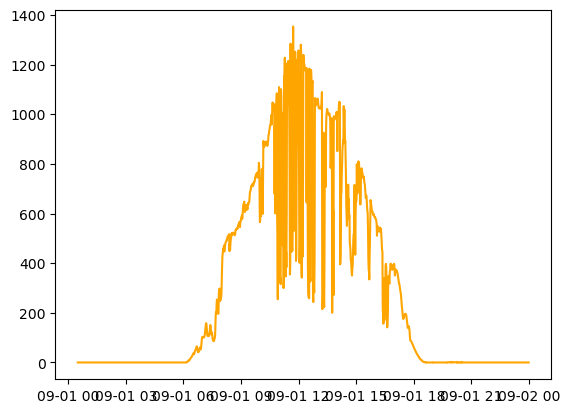

In [208]:
plt.plot(df5.index[time_step:], y5_rescaled_df.values, color='orange', label='Actual Data')

In [209]:
len( y5_rescaled_df.values)

1410

In [211]:
len(df5.index[time_step:])

1410

In [213]:
# Assuming the preprocessing and scaler fitting has been done previously
# and df5 is your input DataFrame

# Resampling the data to 15-minute intervals
df5['Datetime'] = pd.to_datetime(df5['Datetime'])  # Ensure datetime is in the correct format
df5.set_index('Datetime', inplace=True)  # Set the Datetime column as the index
df5_15min = df5.resample('15T').mean()  # Resample to 15-minute intervals

# Preprocess the resampled data
scaled_data5_15min = scaler.transform(df5_15min.values)  # Scale the resampled data

# Prepare dataset for forecasting (data5) for 15-minute intervals
X5_15min, y5_15min = create_dataset(scaled_data5_15min, time_step)
X5_15min = X5_15min.reshape(X5_15min.shape[0], X5_15min.shape[1], 1)

# Predict the test set results using each model
predictions_15min = []

for model in models:
    pred_15min = model.predict(X5_15min)
    predictions_15min.append(pred_15min)

# Combine predictions from all models (e.g., using averaging)
predictions_15min = np.array(predictions_15min)  # Shape: (n_models, n_samples, 1)
combined_predictions_15min = np.mean(predictions_15min, axis=0)  # Averaging the predictions across models

# Rescale the predictions back to the original scale
combined_predictions_rescaled_15min = scaler.inverse_transform(combined_predictions_15min)
y5_rescaled_15min = scaler.inverse_transform(y5_15min.reshape(-1, 1))

# Step 5: Calculate error metrics (MAPE and MSE) for 15-minute interval
# Set a threshold to filter out zero or near-zero values.
threshold = 10  # You can adjust this threshold based on your data.

# Filter out zero or near-zero values.
non_zero_indices_15min = np.where(y5_rescaled_15min > threshold)

# Use the filtered indices to compute MSE and MAPE only for non-zero values.
y5_non_zero_15min = y5_rescaled_15min[non_zero_indices_15min]
predictions_non_zero_15min = combined_predictions_rescaled_15min[non_zero_indices_15min]

# Compute MSE only for non-zero values
mse_15min = mean_squared_error(y5_non_zero_15min, predictions_non_zero_15min)

# Compute MAPE only for non-zero values
mape_15min = np.mean(np.abs((y5_non_zero_15min - predictions_non_zero_15min) / y5_non_zero_15min)) * 100

print(f"15-Minute MAPE: {mape_15min:.2f}%")

# Plot the actual vs predicted values for 15-minute intervals
plt.figure(figsize=(12, 6))
plt.plot(df5_15min.index[time_step:], y5_rescaled_15min, color='orange', label='Actual Data')
plt.plot(df5_15min.index[time_step:], combined_predictions_rescaled_15min, color='blue', linestyle='--', label='Predicted Data')
plt.title('Forecast vs Actual BCP Data (15-Minute Intervals)')
plt.xlabel('Datetime')
plt.ylabel('Irradiation [W/m^2]')
plt.legend()
plt.show()

KeyError: 'Datetime'

In [214]:
df5['Datetime'] = pd.to_datetime(df5['Datetime'])  # Ensure datetime is in the correct format

KeyError: 'Datetime'